/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Next 10 days' sunspot predictions:
71383    54.647696
71384    54.622631
71385    55.905427
71386    58.025755
71387    60.078439
71388    59.756567
71389    59.728650
71390    59.604564
71391    59.490847
71392    59.422467
Name: predicted_mean, dtype: float64


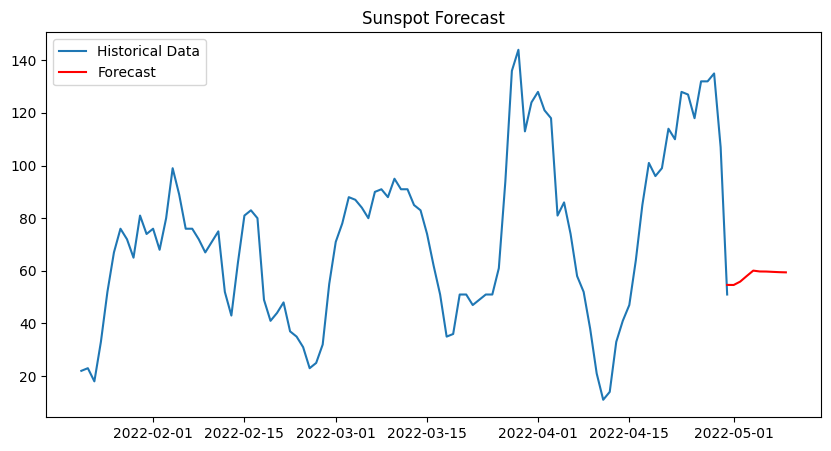

In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load your cleaned dataset
file_path = '/content/day_sunspot.csv'
data = pd.read_csv(file_path)

# Preprocessing
data = data.replace(-1, pd.NA)
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']], errors='coerce')
data = data.dropna(subset=['Date'])
data.set_index('Date', inplace=True)

# Use only the 'Daily Total Sunspot Number' column
sunspots = data['Daily Total Sunspot Number'].dropna()

# Convert the 'Daily Total Sunspot Number' column to numeric,
# errors='coerce' will replace any non-numeric values with NaN
sunspots = pd.to_numeric(sunspots, errors='coerce')

# Drop any rows with NaN values after the conversion
sunspots = sunspots.dropna()

# Fit ARIMA model (you might need to adjust p, d, q values)
model = ARIMA(sunspots, order=(5, 1, 0))  # Example order, tune these
model_fit = model.fit()

# Forecast next 10 days
forecast = model_fit.forecast(steps=10)

# Display forecast
print("Next 10 days' sunspot predictions:")
print(forecast)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(sunspots[-100:], label='Historical Data')
plt.plot(pd.date_range(sunspots.index[-1], periods=10, freq='D'), forecast, label='Forecast', color='red')
plt.title('Sunspot Forecast')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


   Days Ahead  Predicted Sunspots
0         100           59.459841
1         200           59.459841
2         365           59.459841


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


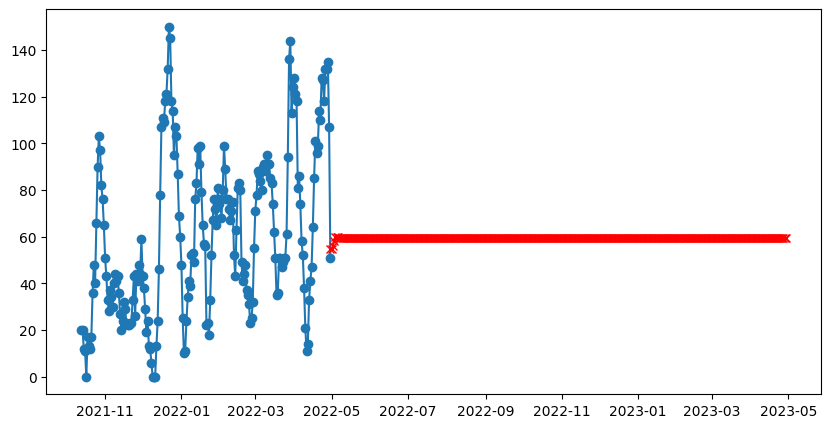

In [2]:


# Use the 'Daily Total Sunspot Number' column for modeling
daily_data = data['Daily Total Sunspot Number']

# Ensure daily_data is numeric, coercing errors to NaN, then drop NaNs
daily_data = pd.to_numeric(daily_data, errors='coerce').dropna()

# Fit ARIMA model
model = ARIMA(daily_data, order=(5, 1, 0))  # Adjust (p, d, q) as needed
model_fit = model.fit()

# Forecast for 365 days
forecast_steps = 365
forecast = model_fit.forecast(steps=forecast_steps)

# Extract predictions for 100, 200, and 365 days
forecast_results = forecast.iloc[[99, 199, 364]]
forecast_df = pd.DataFrame({
    'Days Ahead': [100, 200, 365],
    'Predicted Sunspots': forecast_results.values
})
print(forecast_df)

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(daily_data[-200:], label='Historical Data', marker='o')
plt.plot(
    pd.date_range(daily_data.index[-1], periods=forecast_steps, freq='D'),
    forecast,
    label='Forecast',
    color='red',
    marker='x'
)


INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprgbpfxuz/knc7ajrq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprgbpfxuz/kw78mvdj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93756', 'data', 'file=/tmp/tmprgbpfxuz/knc7ajrq.json', 'init=/tmp/tmprgbpfxuz/kw78mvdj.json', 'output', 'file=/tmp/tmprgbpfxuz/prophet_modele4rx6eex/prophet_model-20241128195108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:51:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:53:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 58.56430865035756
MAPE: 0.6717769411299358
R²: -2.113628740545858


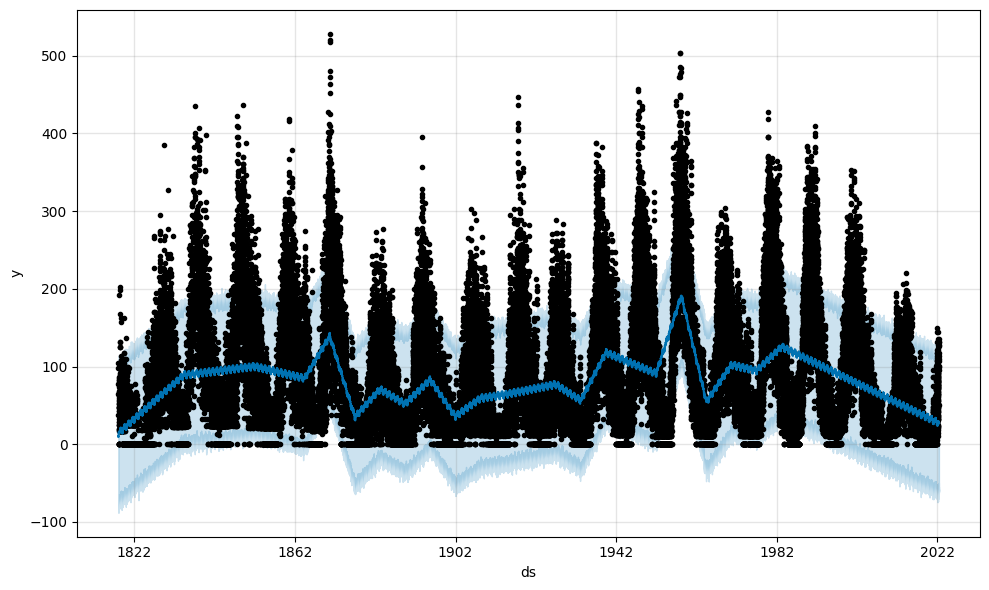

In [6]:
!pip install prophet
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Prepare dataset for Prophet
daily_data = data[['Daily Total Sunspot Number']].reset_index()
daily_data.rename(columns={'Date': 'ds', 'Daily Total Sunspot Number': 'y'}, inplace=True)

# Define the model and add seasonality
model = Prophet()
model.add_seasonality(name='daily', period=365.25, fourier_order=8)  # Yearly seasonality

# Fit the model to historical data
model.fit(daily_data)

# Forecast for the next 30 days
future = model.make_future_dataframe(periods=30, freq='D')  # Specify periods and frequency directly
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)

# Evaluate the model using MAE, MAPE, and R²
y_true = daily_data['y'].iloc[-30:]  # Last 30 days as test data
y_pred = forecast['yhat'][-30:]

mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"R²: {r2}")


In [8]:
# Extract daily forecast values
daily_future = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Display future predictions (next 10 values as an example)
print("Daily Forecast (Next 10 Days):")
print(daily_future.tail(10))


Daily Forecast (Next 10 Days):
              ds       yhat  yhat_lower  yhat_upper
74649 2022-05-21  27.848436  -57.720716  111.685423
74650 2022-05-22  27.594484  -61.953126  120.584656
74651 2022-05-23  27.611683  -59.545130  123.487045
74652 2022-05-24  27.369970  -54.766558  124.619206
74653 2022-05-25  27.320429  -59.267835  108.591148
74654 2022-05-26  27.080665  -60.794105  110.906677
74655 2022-05-27  26.612045  -61.323603  118.791245
74656 2022-05-28  26.624390  -57.876520  116.906433
74657 2022-05-29  26.434181  -60.227601  111.367084
74658 2022-05-30  26.535676  -57.893849  108.242359
